# Check label balance

Most Frequent Label: 10.05%
Least Frequent Label: 9.93%


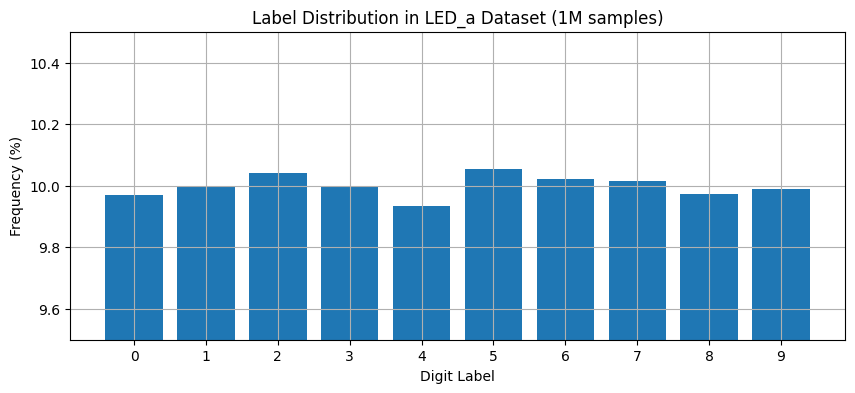

In [1]:
from river.datasets import synth
from collections import Counter
import matplotlib.pyplot as plt

# Generate LED_a dataset (abrupt drift simulation)
dataset = synth.LEDDrift(
    seed=112,
    noise_percentage=0.1,
    irrelevant_features=True,
    n_drift_features=7
).take(1_000_000)

# Count label occurrences
label_counts = Counter()
for _, y in dataset:
    label_counts[y] += 1

# Calculate label frequency percentages
total = sum(label_counts.values())
label_percentages = {label: (count / total) * 100 for label, count in label_counts.items()}

# Print most and least frequent label percentages
mf_label = max(label_percentages.values())
lf_label = min(label_percentages.values())
print(f"Most Frequent Label: {mf_label:.2f}%")
print(f"Least Frequent Label: {lf_label:.2f}%")

# Plot label distribution
labels, percentages = zip(*sorted(label_percentages.items()))
plt.figure(figsize=(10, 4))
plt.bar(labels, percentages)
plt.xlabel("Digit Label")
plt.ylabel("Frequency (%)")
plt.title("Label Distribution in LED_a Dataset (1M samples)")
plt.ylim(9.5, 10.5)
plt.grid(True)
plt.xticks(labels)
plt.show()

In [ ]:
from river import metrics
from river import forest
from river.datasets import synth
import matplotlib.pyplot as plt

arf = forest.ARFClassifier(n_models=100, seed=42)
metric = metrics.Accuracy()

accuracies = []
steps = []

for i, (x, y) in enumerate(
    synth.LEDDrift(
        seed=112,
        noise_percentage=0.1,
        irrelevant_features=True,
        n_drift_features=7
    ).take(1_000_000)
    # ).take(10000)
):
    y_pred = arf.predict_one(x)
    arf.learn_one(x, y)
    metric.update(y, y_pred)

    if i % 100 == 0:
        steps.append(i)
        accuracies.append(metric.get())
        print(f"[{i}] Accuracy: {metric.get():.2f}%")

plt.plot(steps, accuracies)
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.title("ARF Accuracy on LED_a over Time")
plt.grid(True)
plt.show()

print(f"\n✅ Final Accuracy: {metric.get():.2f}%")

[0] Accuracy: 0.00%
[100] Accuracy: 0.27%
[200] Accuracy: 0.44%
[300] Accuracy: 0.54%
[400] Accuracy: 0.60%
[500] Accuracy: 0.64%
[600] Accuracy: 0.66%
[700] Accuracy: 0.66%
[800] Accuracy: 0.68%
[900] Accuracy: 0.69%
[1000] Accuracy: 0.70%
[1100] Accuracy: 0.70%
[1200] Accuracy: 0.70%
[1300] Accuracy: 0.70%
[1400] Accuracy: 0.70%
[1500] Accuracy: 0.70%
[1600] Accuracy: 0.71%
[1700] Accuracy: 0.71%
[1800] Accuracy: 0.71%
[1900] Accuracy: 0.71%
[2000] Accuracy: 0.71%
[2100] Accuracy: 0.72%
[2200] Accuracy: 0.72%
[2300] Accuracy: 0.72%
[2400] Accuracy: 0.72%
[2500] Accuracy: 0.72%
[2600] Accuracy: 0.72%
[2700] Accuracy: 0.72%
[2800] Accuracy: 0.72%
[2900] Accuracy: 0.72%
[3000] Accuracy: 0.72%
[3100] Accuracy: 0.72%
[3200] Accuracy: 0.72%
[3300] Accuracy: 0.73%
[3400] Accuracy: 0.73%
[3500] Accuracy: 0.73%
[3600] Accuracy: 0.73%
[3700] Accuracy: 0.73%
[3800] Accuracy: 0.73%
[3900] Accuracy: 0.73%
[4000] Accuracy: 0.73%
[4100] Accuracy: 0.73%
[4200] Accuracy: 0.73%
[4300] Accuracy: 0.73%


── SPLITS ───────────────────────────────────────────
 total samples         : 1,000
 expert  train / val   : 400 / 100
 router  train / val   : 400 / 100
Total training samples for ARF: 900
── TRAINING ARF (Prequential) ─────────────────────────
[0] Prequential ARF Accuracy: 0.00%
[100] Prequential ARF Accuracy: 0.27%
[200] Prequential ARF Accuracy: 0.44%
[300] Prequential ARF Accuracy: 0.54%
[400] Prequential ARF Accuracy: 0.60%
[500] Prequential ARF Accuracy: 0.64%
[600] Prequential ARF Accuracy: 0.66%
[700] Prequential ARF Accuracy: 0.66%
[800] Prequential ARF Accuracy: 0.68%
Training time: 14.03 seconds
── VALIDATING ARF ─────────────────────────────────────
[0] Validation ARF Accuracy: 1.00%
[50] Validation ARF Accuracy: 0.78%


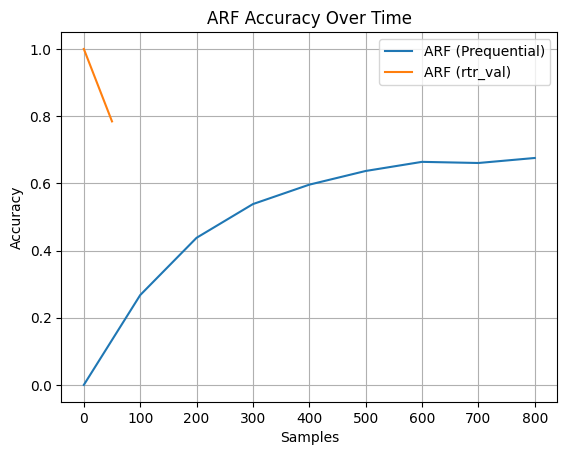

In [3]:
from river import metrics
from river import forest
from river.datasets import synth
import matplotlib.pyplot as plt
import time

# ─────────────────────────────────────────────────────────────────────────────
#  TARGETED Mixture-of-Experts Pipeline (Your Core Logic + Key Improvements)
# ─────────────────────────────────────────────────────────────────────────────

# ───────── OPTIMIZED CONFIG ─────────────────────────────────────────────────
# TOTAL_SAMPLES = 1_000_000
TOTAL_SAMPLES = 1000
TRAIN_RATIO = 0.80
NUM_CLASSES = 10
INPUT_DIM = 24
BATCH_SIZE = 256           # Keep your original batch size
EPOCHS = 75                # More epochs for better convergence
LR = 2e-3                 # Slightly lower LR for stability
SEED_STREAM = 112

# ───────── STREAM & SPLIT (Your Original Logic) ─────────────────────────────
stream = list(
    synth.LEDDrift(
        seed=SEED_STREAM,
        noise_percentage=0.10,
        irrelevant_features=True,
        n_drift_features=7
    ).take(TOTAL_SAMPLES)
)

half = TOTAL_SAMPLES // 2
expert_block = stream[:half]
router_block = stream[half:]

exp_train_sz = int(len(expert_block) * TRAIN_RATIO)
rtr_train_sz = int(len(router_block) * TRAIN_RATIO)

exp_train, exp_val = expert_block[:exp_train_sz], expert_block[exp_train_sz:]
rtr_train, rtr_val = router_block[:rtr_train_sz], router_block[rtr_train_sz:]

print("── SPLITS ───────────────────────────────────────────")
print(f" total samples         : {TOTAL_SAMPLES:,}")
print(f" expert  train / val   : {len(exp_train):,} / {len(exp_val):,}")
print(f" router  train / val   : {len(rtr_train):,} / {len(rtr_val):,}")

# ───────── PREPARE DATA ─────────────────────────────────────────────────
# Combine exp_train, exp_val, and rtr_train for training the ARF model
train_data = exp_train + exp_val + rtr_train
print(f"Total training samples for ARF: {len(train_data):,}")

# ───────── INITIALIZE MODEL & METRIC ────────────────────────────────────
arf = forest.ARFClassifier(n_models=100, seed=42)
preq_metric = metrics.Accuracy()
preq_steps, preq_accuracies = [], []

start_time = time.time()

# ───────── TRAIN ARF MODEL (Prequential Evaluation) ───────────────────────
print("── TRAINING ARF (Prequential) ─────────────────────────")
for i, (x, y) in enumerate(train_data):
    # Prequential: Predict first, then train
    y_pred = arf.predict_one(x)
    preq_metric.update(y, y_pred)
    arf.learn_one(x, y)  # Train ARF
    if i % 100 == 0:
        preq_steps.append(i)
        preq_accuracies.append(preq_metric.get())
        print(f"[{i}] Prequential ARF Accuracy: {preq_metric.get():.2f}%")

train_time = time.time() - start_time
print(f"Training time: {train_time:.2f} seconds")

# ───────── VALIDATE ARF MODEL (Holdout on rtr_val) ───────────────────────
print("── VALIDATING ARF ─────────────────────────────────────")
val_metric = metrics.Accuracy()
val_steps, val_accuracies = [], []

for i, (x, y) in enumerate(rtr_val):
    y_pred = arf.predict_one(x)  # Predict on validation set
    val_metric.update(y, y_pred)
    if i % 50 == 0:  # More frequent updates for smoother curve
        val_steps.append(i)
        val_accuracies.append(val_metric.get())
        print(f"[{i}] Validation ARF Accuracy: {val_metric.get():.2f}%")

# ───────── PLOT RESULTS ────────────────────────────────────────────────
plt.plot(preq_steps, preq_accuracies, label="ARF (Prequential)")
plt.plot(val_steps, val_accuracies, label="ARF (rtr_val)")
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.title("ARF Accuracy Over Time")
plt.grid(True)
plt.legend()
# plt.show()